In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special

In [64]:
def model(x, a):
    return special.expit(a * x) 

def error(x, a):
    return 0.01 * a * (np.abs(x) + 1e-6) + 0.01

In [65]:
def loss_factory(x, y):
    def wrapped(a):
        return np.sum(np.power((y - model(x, a)) / error(x, a), 2))
    return wrapped

In [66]:
np.random.seed(12345)
x = np.linspace(-1, 1, 30)
y = model(x, 3.5)
s = error(x, 3.5)
n = s * np.random.normal(size=x.size)
yn = y + n

In [67]:
loss = loss_factory(x, yn)

In [68]:
solution = optimize.minimize(loss, x0=[3.])
solution

      fun: 36.084631813621556
 hess_inv: array([[0.00449676]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([3.49451316])

In [69]:
xlin = np.linspace(x.min(), x.max(), 200)
yhat = model(xlin, *solution.x)

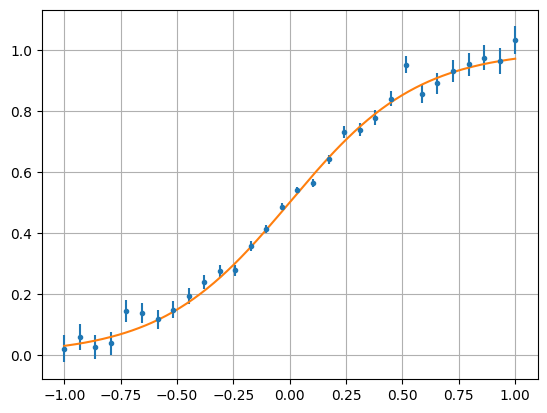

In [70]:
fig, axe = plt.subplots()
axe.errorbar(x, yn, s, linestyle="none", marker=".")
axe.plot(xlin, yhat)
axe.grid()

In [42]:
L = np.vectorize(loss)

In [43]:
a = np.linspace(3, 4, 200)
l = L(a)

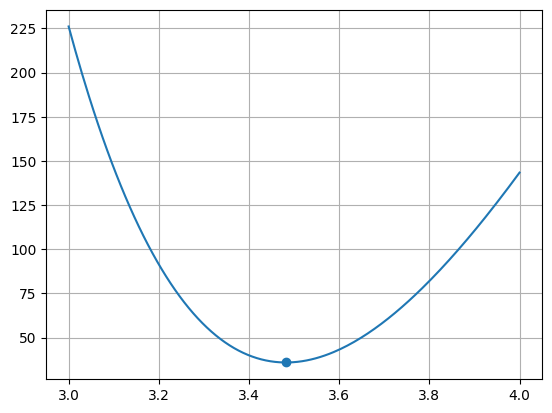

In [44]:
fig, axe = plt.subplots()
axe.plot(a, l)
axe.scatter(solution.x, L(solution.x))
axe.grid()